In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.max_rows=100
pd.options.display.max_columns=100

In [3]:
whoop=pd.read_csv('../Data/whoop_data.csv')

In [4]:
strava=pd.read_csv('../Data/my_actvities.csv')

In [5]:
strava.shape, whoop.shape

((173, 35), (222, 12))

In [6]:
mult_mile=0.000621371
strava['miles']=strava.distance*mult_mile

## Whoop data discovery

In [7]:
whoop.head()

,strain,recovery,sleep_perf,sleep,rec_sleep,date,activity_1,activity_1_score,activity_2,activity_2_score,activity_3,activity_3_score
0,17.3,78%,100%,10:02,8:40,"Today, Jan 4th",Running,15.4,NaN,NaN,NaN,NaN
1,12.8,50%,86%,8:27,9:52,"Thu, Jan 3rd",Weightlifting,7.0,NaN,NaN,NaN,NaN
2,17.6,28%,69%,6:09,8:55,"Wed, Jan 2nd",Running,16.3,NaN,NaN,NaN,NaN
3,18.1,37%,96%,7:44,8:04,"Tue, Jan 1st",Running,15.7,Activity,7.3,NaN,NaN
4,12.1,36%,100%,9:53,8:37,"Mon, Dec 31st",NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
whoop.recovery.value_counts()

24%                 8
36%                 7
32%                 7
37%                 6
85%                 6
27%                 6
30%                 6
25%                 6
49%                 6
16%                 5
35%                 5
21%                 5
28%                 5
63%                 5
38%                 5
44%                 5
48%                 4
61%                 4
33%                 4
69%                 4
34%                 4
94%                 4
18%                 4
75%                 4
26%                 4
59%                 3
60%                 3
17%                 3
19%                 3
13%                 3
89%                 3
54%                 3
29%                 3
Incomplete\nData    3
46%                 3
20%                 2
55%                 2
58%                 2
78%                 2
82%                 2
95%                 2
87%                 2
39%                 2
93%                 2
11%                 2
23%       

In [9]:
print(whoop.activity_1.value_counts())
print(whoop.activity_2.value_counts())
print(whoop.activity_3.value_counts())

Running               69
Cycling               26
Swimming              15
Weightlifting          6
Activity               5
Hiking/Rucking         3
Other                  2
Triathlon              2
Football               1
Golf                   1
Functional Fitness     1
Soccer                 1
Name: activity_1, dtype: int64
Running     9
Activity    6
Cycling     4
Swimming    3
Other       2
Name: activity_2, dtype: int64
Cycling    4
Other      1
Running    1
Name: activity_3, dtype: int64


In [10]:
whoop['recovery']=whoop['recovery'].astype(str).apply(lambda x: np.nan if '%' not in x else float(x[:len(x)-1])/100)
whoop['sleep_perf']=whoop['sleep_perf'].astype(str).apply(lambda x: np.nan if '-' in x or "na" in x else float(x[:len(x)-1])/100)


In [11]:
whoop['rec_color']=whoop.recovery.apply(lambda x: 'red' if x<.34 else ('yellow' if x<.67 else ('none' if np.isnan(x) else 'green') ))
whoop.rec_color.value_counts()

yellow    83
red       83
green     50
none       6
Name: rec_color, dtype: int64

In [12]:
whoop.head()

,strain,recovery,sleep_perf,sleep,rec_sleep,date,activity_1,activity_1_score,activity_2,activity_2_score,activity_3,activity_3_score,rec_color
0,17.3,0.78,1.00,10:02,8:40,"Today, Jan 4th",Running,15.4,NaN,NaN,NaN,NaN,green
1,12.8,0.50,0.86,8:27,9:52,"Thu, Jan 3rd",Weightlifting,7.0,NaN,NaN,NaN,NaN,yellow
2,17.6,0.28,0.69,6:09,8:55,"Wed, Jan 2nd",Running,16.3,NaN,NaN,NaN,NaN,red
3,18.1,0.37,0.96,7:44,8:04,"Tue, Jan 1st",Running,15.7,Activity,7.3,NaN,NaN,yellow
4,12.1,0.36,1.00,9:53,8:37,"Mon, Dec 31st",NaN,NaN,NaN,NaN,NaN,NaN,yellow


(array([ 1.,  0.,  1., 10., 27., 39., 47., 40., 36., 21.]),
 array([ 0.  ,  2.07,  4.14,  6.21,  8.28, 10.35, 12.42, 14.49, 16.56,
        18.63, 20.7 ]),
 <a list of 10 Patch objects>)

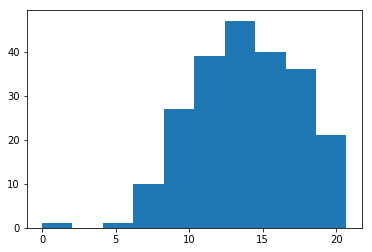

In [13]:
whoop.strain=whoop.strain.apply(lambda x: float(x) if x!="---" else 0)
plt.hist(whoop.strain)

In [14]:
for i in range(1,8):
    print(whoop.recovery.autocorr(lag=i))

0.01339240935736611
0.04043527262019506
0.12884124388214863
0.0557647046489472
-0.015350577169256781
-0.015275776233907717
0.08873767330893535


In [15]:
whoop.dtypes

strain              float64
recovery            float64
sleep_perf          float64
sleep                object
rec_sleep            object
date                 object
activity_1           object
activity_1_score    float64
activity_2           object
activity_2_score    float64
activity_3           object
activity_3_score    float64
rec_color            object
dtype: object

In [16]:
def time_to_dec(t):
    if ":" in t:
        hr=float(t[:t.find(':')])
        m=float(t[t.find(':')+1:])/60
        return hr+m
    else:
        return np.nan
whoop.sleep=whoop.sleep.astype(str).apply(time_to_dec)
whoop.rec_sleep=whoop.rec_sleep.astype(str).apply(time_to_dec)

In [17]:
whoop.head()

,strain,recovery,sleep_perf,sleep,rec_sleep,date,activity_1,activity_1_score,activity_2,activity_2_score,activity_3,activity_3_score,rec_color
0,17.3,0.78,1.00,10.033333,8.666667,"Today, Jan 4th",Running,15.4,NaN,NaN,NaN,NaN,green
1,12.8,0.50,0.86,8.450000,9.866667,"Thu, Jan 3rd",Weightlifting,7.0,NaN,NaN,NaN,NaN,yellow
2,17.6,0.28,0.69,6.150000,8.916667,"Wed, Jan 2nd",Running,16.3,NaN,NaN,NaN,NaN,red
3,18.1,0.37,0.96,7.733333,8.066667,"Tue, Jan 1st",Running,15.7,Activity,7.3,NaN,NaN,yellow
4,12.1,0.36,1.00,9.883333,8.616667,"Mon, Dec 31st",NaN,NaN,NaN,NaN,NaN,NaN,yellow


### Making Variables

In [18]:
whoop['activity_total']=whoop[['activity_1_score','activity_2_score','activity_3_score']].apply(lambda x: sum([0 if np.isnan(y) else 1 for y in x ]),axis=1 )
whoop.activity_total.value_counts()

1    108
0     90
2     18
3      6
Name: activity_total, dtype: int64

In [19]:
whoop['sleep_addition']=whoop.rec_sleep-7.75

In [20]:
whoop['pday_rec']=whoop['recovery'].shift(-1)
whoop['pday_rec_col']=whoop['rec_color'].shift(-1)
whoop['pday_acts']=whoop['activity_total'].shift(-1)
whoop['pday_strain']=whoop['strain']
whoop['pday_sleep']=whoop.sleep.shift(-1)
whoop['pday_sleep_perf']=whoop.sleep_perf.shift(-1)

In [21]:
whoop['rolling_prev_2']=whoop.pday_sleep.rolling(2).mean()
whoop['prev_strain_rec_gap']=whoop.pday_strain/whoop.pday_strain.max()-whoop.pday_rec

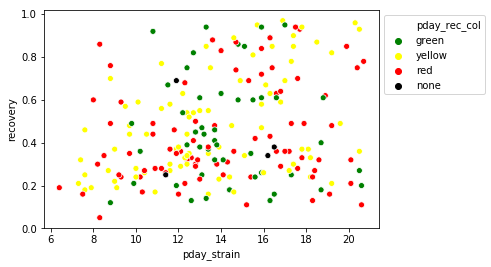

In [22]:
palet={'green':'green','yellow':'yellow','green':'green','none':'black','red':'red'}
sns.scatterplot('pday_strain','recovery',data=whoop, hue='pday_rec_col',
                hue_order=['green','yellow','red','none'],
               palette=palet)
plt.legend(bbox_to_anchor=(1,1))

In [23]:
whoop.head()

,strain,recovery,sleep_perf,sleep,rec_sleep,date,activity_1,activity_1_score,activity_2,activity_2_score,activity_3,activity_3_score,rec_color,activity_total,sleep_addition,pday_rec,pday_rec_col,pday_acts,pday_strain,pday_sleep,pday_sleep_perf,rolling_prev_2,prev_strain_rec_gap
0,17.3,0.78,1.00,10.033333,8.666667,"Today, Jan 4th",Running,15.4,NaN,NaN,NaN,NaN,green,1,0.916667,0.50,yellow,1.0,17.3,8.450000,0.86,NaN,0.335749
1,12.8,0.50,0.86,8.450000,9.866667,"Thu, Jan 3rd",Weightlifting,7.0,NaN,NaN,NaN,NaN,yellow,1,2.116667,0.28,red,1.0,12.8,6.150000,0.69,7.300000,0.338357
2,17.6,0.28,0.69,6.150000,8.916667,"Wed, Jan 2nd",Running,16.3,NaN,NaN,NaN,NaN,red,1,1.166667,0.37,yellow,2.0,17.6,7.733333,0.96,6.941667,0.480242
3,18.1,0.37,0.96,7.733333,8.066667,"Tue, Jan 1st",Running,15.7,Activity,7.3,NaN,NaN,yellow,2,0.316667,0.36,yellow,0.0,18.1,9.883333,1.00,8.808333,0.514396
4,12.1,0.36,1.00,9.883333,8.616667,"Mon, Dec 31st",NaN,NaN,NaN,NaN,NaN,NaN,yellow,0,0.866667,0.16,red,1.0,12.1,5.583333,0.63,7.733333,0.424541


In [24]:
whoop.date.tail()

217     Fri, Jun 1st
218    Thu, May 31st
219    Wed, May 30th
220    Tue, May 29th
221    Mon, May 28th
Name: date, dtype: object

In [25]:
strava.start_date.dtype,whoop.date.dtype

(dtype('O'), dtype('O'))

In [26]:
strava.start_date.head()

0    2018-04-01 15:54:18+00:00
1    2018-04-03 10:35:19+00:00
2    2018-04-04 10:58:33+00:00
3    2018-04-05 10:29:13+00:00
4    2018-04-06 21:56:04+00:00
Name: start_date, dtype: object

In [27]:
month_dict={'Jan':1,'Feb':2,'Mar':3,'Apr':4, 'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
whoop['month']=whoop.date.apply(lambda x: month_dict[x[x.find(',')+1:x.find(',')+5].strip(" ")])
whoop['day']=whoop.date.apply(lambda x: x[-4:-2])
whoop['year']=whoop.month.apply(lambda x: 2018 if x!=1 else 2019)
whoop['date_string']=whoop.year.astype(str) + "-" + whoop.month.astype(str).str.strip(' ').str.zfill(2) + "-" + whoop.day.astype(str).str.strip(' ').str.zfill(2)

In [28]:
strava['day']=strava.start_date.apply(lambda x: x[8:10])
strava['month']=strava.start_date.apply(lambda x: x[5:7])
strava['year']=strava.start_date.apply(lambda x: x[:4])
strava['date_string']=strava.start_date.apply(lambda x: x[:10])

In [29]:
## Checking to see if there are more than one run on each day (since that will complicate things)
multi_act=strava.groupby(['date_string','type']).type.count().sort_values(ascending=False).unstack()
multi_dates=multi_act[multi_act.Run>1].index.values
mult_df=strava[strava.date_string.isin(multi_dates)]
mult_df.start_date_local 
## way to do it is to sort on date and assign an activity number in strava, 
## reshape activities in whoop so it's activity unique rows, then merge on activity number and activity type and date

73     2018-07-15 06:50:01+00:00
74     2018-07-15 07:39:48+00:00
75     2018-07-15 08:57:52+00:00
132    2018-10-03 06:27:25+00:00
133    2018-10-03 07:20:42+00:00
169    2018-12-25 16:51:37+00:00
170    2018-12-26 06:40:44+00:00
Name: start_date_local, dtype: object

In [ ]:
## move might be to transpose the subset by date, then melt it, then join it back

## options are to 
#1. split each table and append them on top of themselves (probably easiest) 
#2. wide to long with stubname match using regex

In [137]:
test.rename(columns={'activity_1':'activity_1_act','activity_2':'activity_2_act','activity_3':'actvity_3_act'},inplace=True)
pd.wide_to_long(test,['activity_1','activity_2','activity_3'],['date','strain'],'activity')

/Users/irarickman/anaconda2/envs/py35/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,,,activity_2_act,actvity_3_act,activity_1_act,activity_1_score,activity_3_score,activity_2_score,activity_1,activity_2,activity_3
date,strain,activity,,,,,,,,,


In [132]:
test=whoop[['date','strain','activity_1','activity_1_score','activity_2','activity_2_score','activity_3','activity_3_score']]
test_2=test.set_index(['date','strain']).stack().reset_index().rename(columns={'level_2':'var',0:'value'})
test_2['var']=test_2['var'].apply(lambda x: 'activity' if 'score' not in x else 'score')
test_2.set_index(['date','strain','var'],append=True).unstack()
#.pivot(index=['date','strain'],columns=['var'],values=['value'])

value      
var                                  activity score
    date           strain                          
0   Today, Jan 4th 17.3               Running   NaN
1   Today, Jan 4th 17.3                   NaN  15.4
2   Thu, Jan 3rd   12.8         Weightlifting   NaN
3   Thu, Jan 3rd   12.8                   NaN     7
4   Wed, Jan 2nd   17.6               Running   NaN
5   Wed, Jan 2nd   17.6                   NaN  16.3
6   Tue, Jan 1st   18.1               Running   NaN
7   Tue, Jan 1st   18.1                   NaN  15.7
8   Tue, Jan 1st   18.1              Activity   NaN
9   Tue, Jan 1st   18.1                   NaN   7.3
10  Sun, Dec 30th  19.1              Activity   NaN
11  Sun, Dec 30th  19.1                   NaN  18.5
12  Sat, Dec 29th  13.8        Hiking/Rucking   NaN
13  Sat, Dec 29th  13.8                   NaN  10.5
14  Fri, Dec 28th  13.4               Running   NaN
15  Fri, Dec 28th  13.4                   NaN  10.7
16  Wed, Dec 26th  14.4    Functional Fitness   NaN
17  Wed, Dec 26th  14.4                   NaN  13.4
18  Tue, Dec 25th  13.6               Running   NaN
19  Tue, Dec 25th  13.6                   NaN  11.2
20  Mon, Dec 24th  17.0               Running   NaN
21  Mon, Dec 24th  17.0                   NaN  15.2
22  Sat, Dec 22nd  19.2               Running   NaN
23  Sat, Dec 22nd  19.2                   NaN    18
24  Thu, Dec 20th  18.2               Running   NaN
25  Thu, Dec 20th  18.2                   NaN  16.9
26  Sun, Dec 16th  17.7               Running   NaN
27  Sun, Dec 16th  17.7                   NaN  16.8
28  Sat, Dec 15th  18.7               Running   NaN
29  Sat, Dec 15th  18.7                   NaN  16.3
30  Fri, Dec 14th  14.9              Activity   NaN
31  Fri, Dec 14th  14.9                   NaN   7.9
32  Fri, Dec 14th  14.9              Activity   NaN
33  Fri, Dec 14th  14.9                   NaN     9
34  Thu, Dec 13th  16.6               Running   NaN
35  Thu, Dec 13th  16.6                   NaN  12.9
36  Tue, Dec 11th  15.7               Running   NaN
37  Tue, Dec 11th  15.7                   NaN  13.3
38  Sun, Dec 9th   16.9               Running   NaN
39  Sun, Dec 9th   16.9                   NaN  12.7
40  Sat, Dec 8th   18.7               Running   NaN
41  Sat, Dec 8th   18.7                   NaN  16.7
42  Wed, Dec 5th   17.4               Running   NaN
43  Wed, Dec 5th   17.4                   NaN  14.8
44  Mon, Dec 3rd   17.6               Running   NaN
45  Mon, Dec 3rd   17.6                   NaN    16
46  Sat, Dec 1st   16.6               Running   NaN
47  Sat, Dec 1st   16.6                   NaN  14.5
48  Wed, Nov 28th  17.8               Running   NaN
49  Wed, Nov 28th  17.8                   NaN  16.5
...                                       ...   ...
274 Mon, Jul 2nd   17.9               Running   NaN
275 Mon, Jul 2nd   17.9                   NaN  17.5
276 Sat, Jun 30th  14.6                 Other   NaN
277 Sat, Jun 30th  14.6                   NaN   7.6
278 Fri, Jun 29th  15.9                 Other   NaN
279 Fri, Jun 29th  15.9                   NaN   7.6
280 Fri, Jun 29th  15.9              Activity   NaN
281 Fri, Jun 29th  15.9                   NaN  12.3
282 Thu, Jun 28th  16.1               Running   NaN
283 Thu, Jun 28th  16.1                   NaN  15.3
284 Wed, Jun 27th  12.4              Swimming   NaN
285 Wed, Jun 27th  12.4                   NaN  10.4
286 Tue, Jun 26th  12.4               Cycling   NaN
287 Tue, Jun 26th  12.4                   NaN  11.8
288 Mon, Jun 25th  15.9               Running   NaN
289 Mon, Jun 25th  15.9                   NaN  15.3
290 Sun, Jun 24th  10.3                  Golf   NaN
291 Sun, Jun 24th  10.3                   NaN   7.2
292 Sat, Jun 23rd  20.5               Cycling   NaN
293 Sat, Jun 23rd  20.5                   NaN  18.9
294 Sat, Jun 23rd  20.5               Running   NaN
295 Sat, Jun 23rd  20.5                   NaN  12.7
296 Fri, Jun 22nd  14.6              Swimming   NaN
297 Fri, Jun 22nd  14.6             

In [64]:
val_cols=['activity_1','activity_2','activity_3','activity_1_score','activity_2_score','activity_3_score']
id_cols=whoop.columns.drop(val_cols)
whoop.melt(id_vars=id_cols, value_vars=val_cols)

,strain,recovery,sleep_perf,sleep,rec_sleep,date,rec_color,activity_total,sleep_addition,pday_rec,pday_rec_col,pday_acts,pday_strain,pday_sleep,pday_sleep_perf,rolling_prev_2,prev_strain_rec_gap,month,day,year,date_string,variable,value
0,17.3,0.78,1.00,10.033333,8.666667,"Today, Jan 4th",green,1,0.916667,0.50,yellow,1.0,17.3,8.450000,0.86,NaN,0.335749,1,4,2019,2019-01-04,activity_1,Running
1,12.8,0.50,0.86,8.450000,9.866667,"Thu, Jan 3rd",yellow,1,2.116667,0.28,red,1.0,12.8,6.150000,0.69,7.300000,0.338357,1,3,2019,2019-01-03,activity_1,Weightlifting
2,17.6,0.28,0.69,6.150000,8.916667,"Wed, Jan 2nd",red,1,1.166667,0.37,yellow,2.0,17.6,7.733333,0.96,6.941667,0.480242,1,2,2019,2019-01-02,activity_1,Running
3,18.1,0.37,0.96,7.733333,8.066667,"Tue, Jan 1st",yellow,2,0.316667,0.36,yellow,0.0,18.1,9.883333,1.00,8.808333,0.514396,1,1,2019,2019-01-01,activity_1,Running
4,12.1,0.36,1.00,9.883333,8.616667,"Mon, Dec 31st",yellow,0,0.866667,0.16,red,1.0,12.1,5.583333,0.63,7.733333,0.424541,12,31,2018,2018-12-31,activity_1,NaN
5,19.1,0.16,0.63,5.583333,8.883333,"Sun, Dec 30th",red,1,1.133333,0.30,red,1.0,19.1,6.950000,0.83,6.266667,0.622705,12,30,2018,2018-12-30,activity_1,Activity
6,13.8,0.30,0.83,6.950000,8.333333,"Sat, Dec 29th",red,1,0.583333,0.16,red,1.0,13.8,6.933333,0.88,6.941667,0.506667,12,29,2018,2018-12-29,activity_1,Hiking/Rucking
7,13.4,0.16,0.88,6.933333,7.900000,"Fri, Dec 28th",red,1,0.150000,0.59,yellow,0.0,13.4,7.366667,1.00,7.150000,0.057343,12,28,2018,2018-12-28,activity_1,Running
8,9.3,0.59,1.00,7.366667,6.300000,"Thu, Dec 27th",yellow,0,-1.450000,0.18,red,1.0,9.3,7.266667,1.00,7.316667,0.269275,12,27,2018,2018-12-27,activity_1,NaN
9,14.4,0.18,1.00,7.266667,7.083333,"Wed, Dec 26th",red,1,-0.666667,NaN,none,1.0,14.4,NaN,NaN,NaN,NaN,12,26,2018,2018-12-26,activity_1,Functional Fitness


## Next steps

1. Make a few more features
2. Attach whoop to strava
3. Run linear reg - see how it does

/Users/irarickman/anaconda2/envs/py35/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


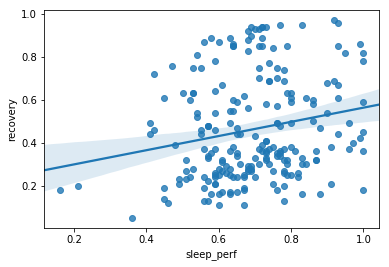

In [171]:
## maybe logarithimc?
sns.regplot(whoop.sleep_perf, whoop.recovery)

/Users/irarickman/anaconda2/envs/py35/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


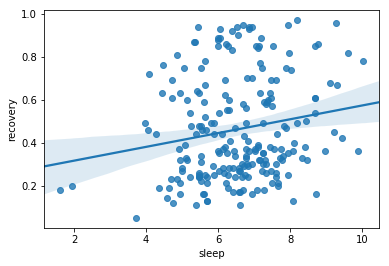

In [172]:
sns.regplot(whoop.sleep, whoop.recovery)